In [1]:
from streamlit import *
import folium
import pandas as pd
import numpy as np
import requests
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv('city_temperature.csv')
print(weather.shape)
weather.head()

C:\Users\daanh\AppData\Local\Temp\ipykernel_1264\633638840.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv('city_temperature.csv')


(2906327, 8)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [3]:
def fah_to_c(fah):
    if fah < -75:
        return np.nan
    else: 
        return (fah - 32)/1.8
weather.AvgTemperature = weather.AvgTemperature.map(fah_to_c)

In [4]:
weather.loc[weather.City == 'Hamburg', 'City'] = 'Berlin'

In [5]:
cities_list=["Amsterdam","Athens","Barcelona","Berlin","Budapest","Lisbon","London","Paris","Rome","Vienna",]
weather = weather[weather.City.isin(cities_list)]

In [6]:
cities_in_data = weather.City.unique()

In [7]:
assert set(cities_list) == set(cities_in_data)

In [8]:
def create_timestamp(year, month, day):
    return pd.to_datetime(f'{year} {month} {day}')

In [9]:
ts_col = []
faultcount = 0
for row in weather.itertuples():
    try:
        ts_col.append(create_timestamp(row.Year, row.Month, row.Day))
    except:
        ts_col.append(np.nan)
        faultcount+=1
print(faultcount)

176


In [10]:
weather['Timestamp'] = ts_col

In [11]:
weather.drop(columns=['Region', 'Country','Month','Day' , 'Year' ,'State'], inplace=True)

In [12]:
weather.dropna(inplace=True)

In [13]:
weather.head()

,City,AvgTemperature,Timestamp
632643,Vienna,2.055556,1995-01-01
632644,Vienna,1.500000,1995-01-02
632645,Vienna,-0.333333,1995-01-03
632646,Vienna,-3.777778,1995-01-04
632647,Vienna,-5.000000,1995-01-05


In [14]:
timeseries = weather.reset_index(drop=True).pivot_table(index='Timestamp', columns='City',
                                                        values='AvgTemperature', aggfunc='mean')
timeseries.head()

City,Amsterdam,Athens,Barcelona,Berlin,Budapest,Lisbon,London,Paris,Rome,Vienna
Timestamp,,,,,,,,,,
1995-01-01,3.111111,17.555556,10.444444,NaN,1.611111,11.944444,1.222222,3.000000,14.611111,2.055556
1995-01-02,3.666667,17.555556,6.944444,NaN,1.611111,8.277778,0.333333,1.777778,8.055556,1.500000
1995-01-03,0.722222,12.500000,5.000000,NaN,-1.666667,7.666667,-0.611111,2.222222,5.333333,-0.333333
1995-01-04,-1.555556,10.500000,4.000000,-4.666667,-2.222222,11.833333,3.166667,-0.722222,4.388889,-3.777778
1995-01-05,-3.444444,11.222222,4.333333,NaN,-0.555556,13.444444,4.166667,-2.777778,2.777778,-5.000000


In [15]:
timeseries=timeseries.interpolate().fillna(method='bfill').fillna(method='ffill')
timeseries.head()

City,Amsterdam,Athens,Barcelona,Berlin,Budapest,Lisbon,London,Paris,Rome,Vienna
Timestamp,,,,,,,,,,
1995-01-01,3.111111,17.555556,10.444444,-4.666667,1.611111,11.944444,1.222222,3.000000,14.611111,2.055556
1995-01-02,3.666667,17.555556,6.944444,-4.666667,1.611111,8.277778,0.333333,1.777778,8.055556,1.500000
1995-01-03,0.722222,12.500000,5.000000,-4.666667,-1.666667,7.666667,-0.611111,2.222222,5.333333,-0.333333
1995-01-04,-1.555556,10.500000,4.000000,-4.666667,-2.222222,11.833333,3.166667,-0.722222,4.388889,-3.777778
1995-01-05,-3.444444,11.222222,4.333333,-3.455556,-0.555556,13.444444,4.166667,-2.777778,2.777778,-5.000000


In [16]:
# timeseries.to_csv('weather_timeseries.csv')
# weather.head().to_csv('weather_head.csv')

C:\Users\daanh\AppData\Local\Temp\ipykernel_1264\452900855.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


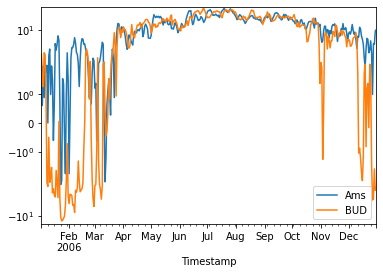

In [17]:
fig,t=plt.subplots()
timeseries.loc[((timeseries.index>'2006' )&(timeseries.index< '2007') ),'Amsterdam'].plot(ax=t,label='Ams')
timeseries.loc[((timeseries.index>'2006' )&(timeseries.index< '2007') ),'Budapest'].plot(ax=t,label='BUD')
t.set_yscale('symlog')
t.legend()
fig.show()